# Import

In [59]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from utils import *

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [60]:
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
test = pd.read_csv('./open/test.csv').drop('ID',axis=1)

In [61]:
# 연료 특징들을 하나의 컬럼으로 통합
train['연료'] = 0
for col in tqdm(['압축천연가스(CNG)','경유','가솔린','하이브리드','액화석유가스(LPG)']):
    train.loc[train[col]==1,'연료'] = col
train = train.drop(['압축천연가스(CNG)','경유','가솔린','하이브리드','액화석유가스(LPG)'],axis=1)

test['연료'] = 0
for col in tqdm(['압축천연가스(CNG)','경유','가솔린','하이브리드','액화석유가스(LPG)']):
    test.loc[test[col]==1,'연료'] = col
test = test.drop(['압축천연가스(CNG)','경유','가솔린','하이브리드','액화석유가스(LPG)'],axis=1)

100%|██████████| 5/5 [00:00<00:00, 2500.48it/s]


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   생산년도    57920 non-null  int64  
 1   모델출시년도  57920 non-null  int64  
 2   브랜드     57920 non-null  object 
 3   차량모델명   57920 non-null  object 
 4   판매도시    57920 non-null  object 
 5   판매구역    57920 non-null  object 
 6   주행거리    57920 non-null  int64  
 7   배기량     57920 non-null  int64  
 8   가격      57920 non-null  float64
 9   연료      57920 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.4+ MB


In [63]:
train.describe(include='object').T

,count,unique,top,freq
브랜드,57920,20,opel,6651
차량모델명,57920,143,astra,2537
판매도시,57920,3224,WAR,3245
판매구역,57920,17,MAZ,10846
연료,57920,5,가솔린,30000


In [64]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
생산년도,57920.0,2011.355352,5.174108,1978.00,2008.00,2011.00,2016.00,2022.0
모델출시년도,57920.0,2008.033408,5.087963,1983.00,2004.00,2008.00,2012.00,2021.0
주행거리,57920.0,167869.088398,83191.196161,1.00,111434.50,171000.00,220000.00,2500000.0
배기량,57920.0,1788.160135,545.413818,875.00,1461.00,1753.00,1995.00,6300.0
가격,57920.0,52.211752,35.399718,1.17,24.57,42.25,73.97,156.0


In [65]:
# 왜도, 첨도 확인
univariate_stats(train).T

,생산년도,모델출시년도,주행거리,가격,배기량,브랜드,차량모델명,판매도시,판매구역,연료
Skew,-0.248113,-0.23633,0.587413,0.908303,2.320969,-,-,-,-,-
Kurt,-0.280215,0.124462,10.972374,0.014098,10.429511,-,-,-,-,-


In [7]:
display(train.head(2), test.head(2))

,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,가격,연료
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,51.74,가솔린
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,41.47,가솔린


,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,연료
0,2017,2013,mazda,3,KAL,WIE,57000,1998,가솔린
1,2011,2008,ford,fiesta,ROP,POD,159000,1242,가솔린


# EDA

In [11]:
numeric_cols = []
object_cols = []

for col in train.columns:
    if is_numeric_dtype(train[col]):
        numeric_cols.append(col)
    elif not(is_numeric_dtype(train[col])):
        object_cols.append(col)

print('연속형 변수 : ', numeric_cols)        
print('범주형 변수 : ', object_cols)        

연속형 변수 :  ['생산년도', '모델출시년도', '주행거리', '배기량', '가격']
범주형 변수 :  ['브랜드', '차량모델명', '판매도시', '판매구역', '연료']


In [39]:
# 범주형 변수들의 unique값 개수 확인
for i in range(len(object_cols)):
    print(object_cols[i], len(train[object_cols[i]].unique()), sep=' : ')

브랜드 : 20
차량모델명 : 143
판매도시 : 3224
판매구역 : 17
연료 : 5


## histogram

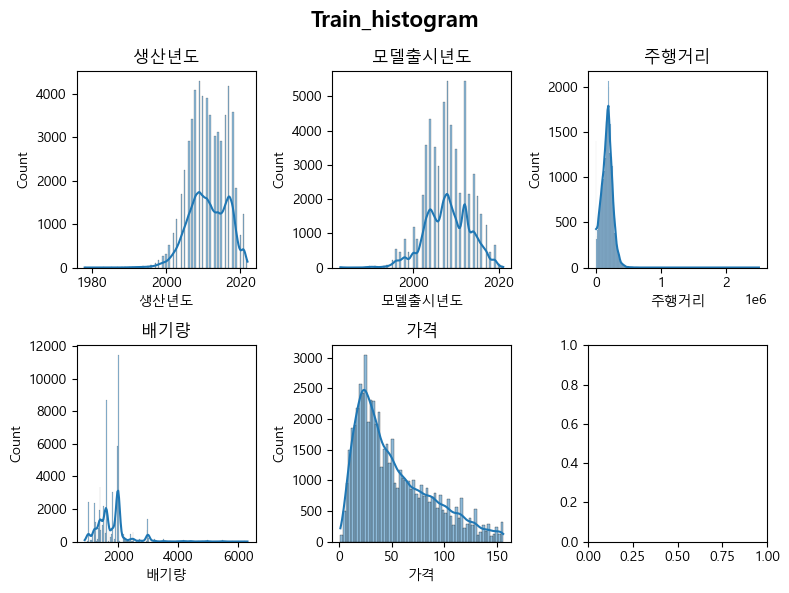

In [66]:
plot_hist(train, "Train_histogram", numeric_cols=numeric_cols)

## boxplot
- train data boxplot

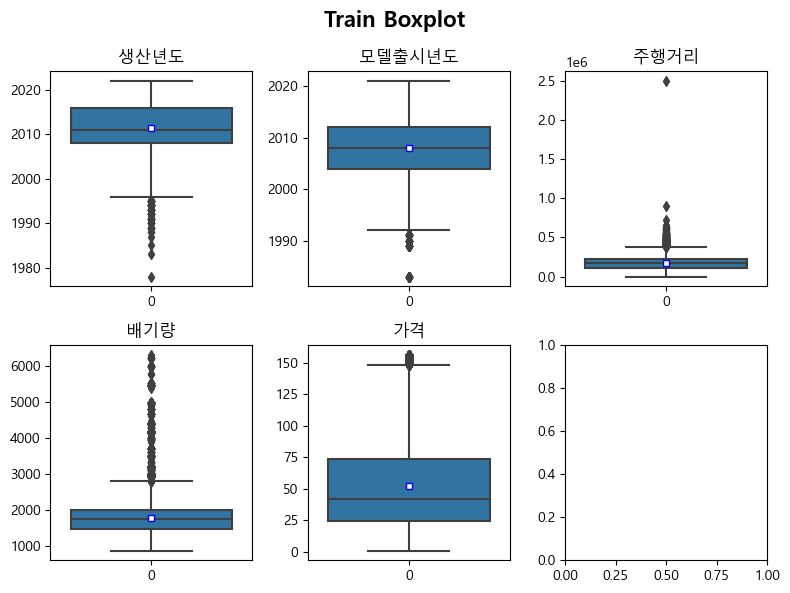

In [67]:
plot_boxplot(train, title='Train', drop_cols=object_cols)

- 범주형 변수 별 boxplot(브랜드, 판매구역, 연료)

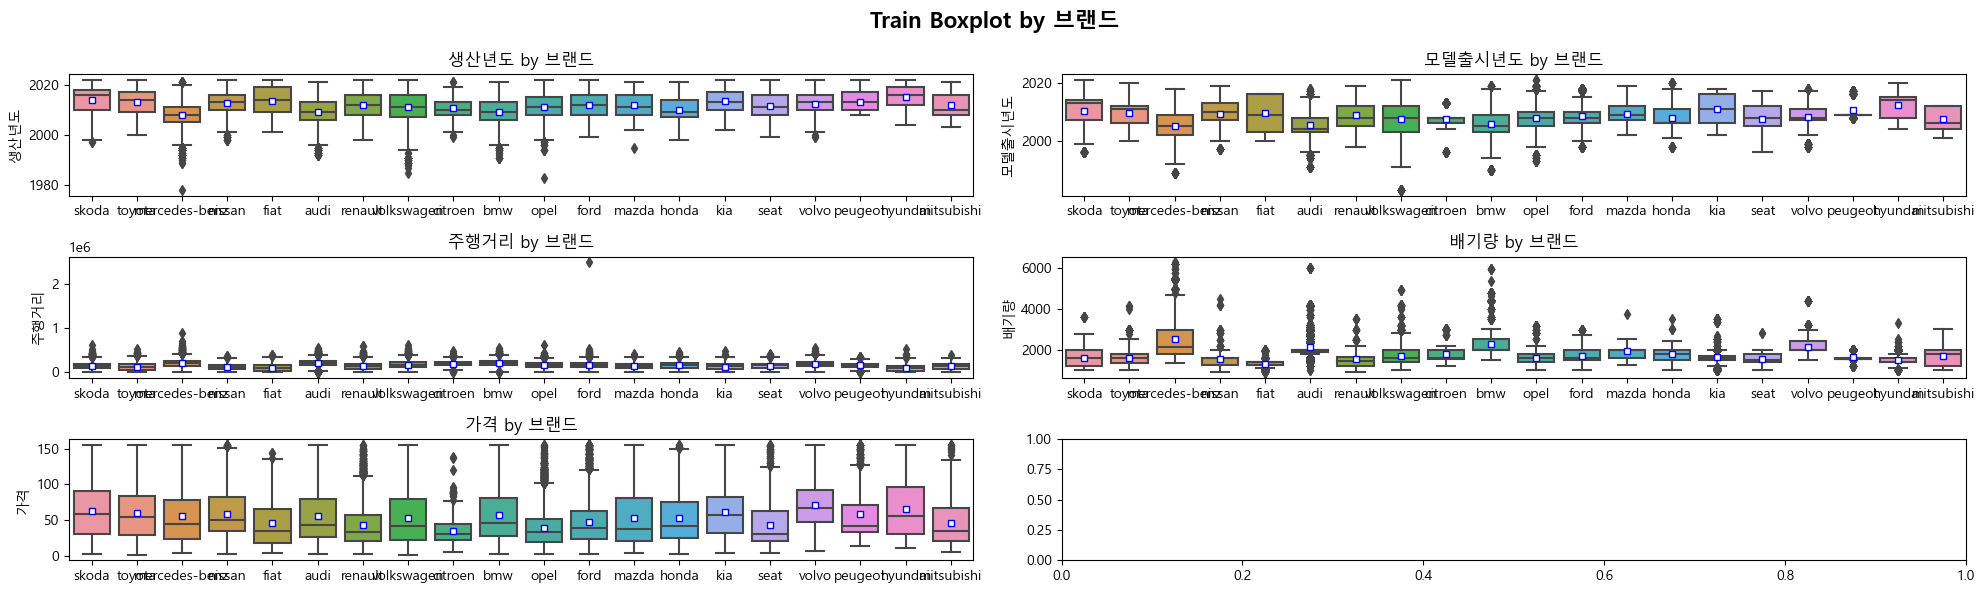

In [69]:
plot_boxplot(train, hue=True, hues='브랜드', title='Train', drop_cols=object_cols, n_cols=2)

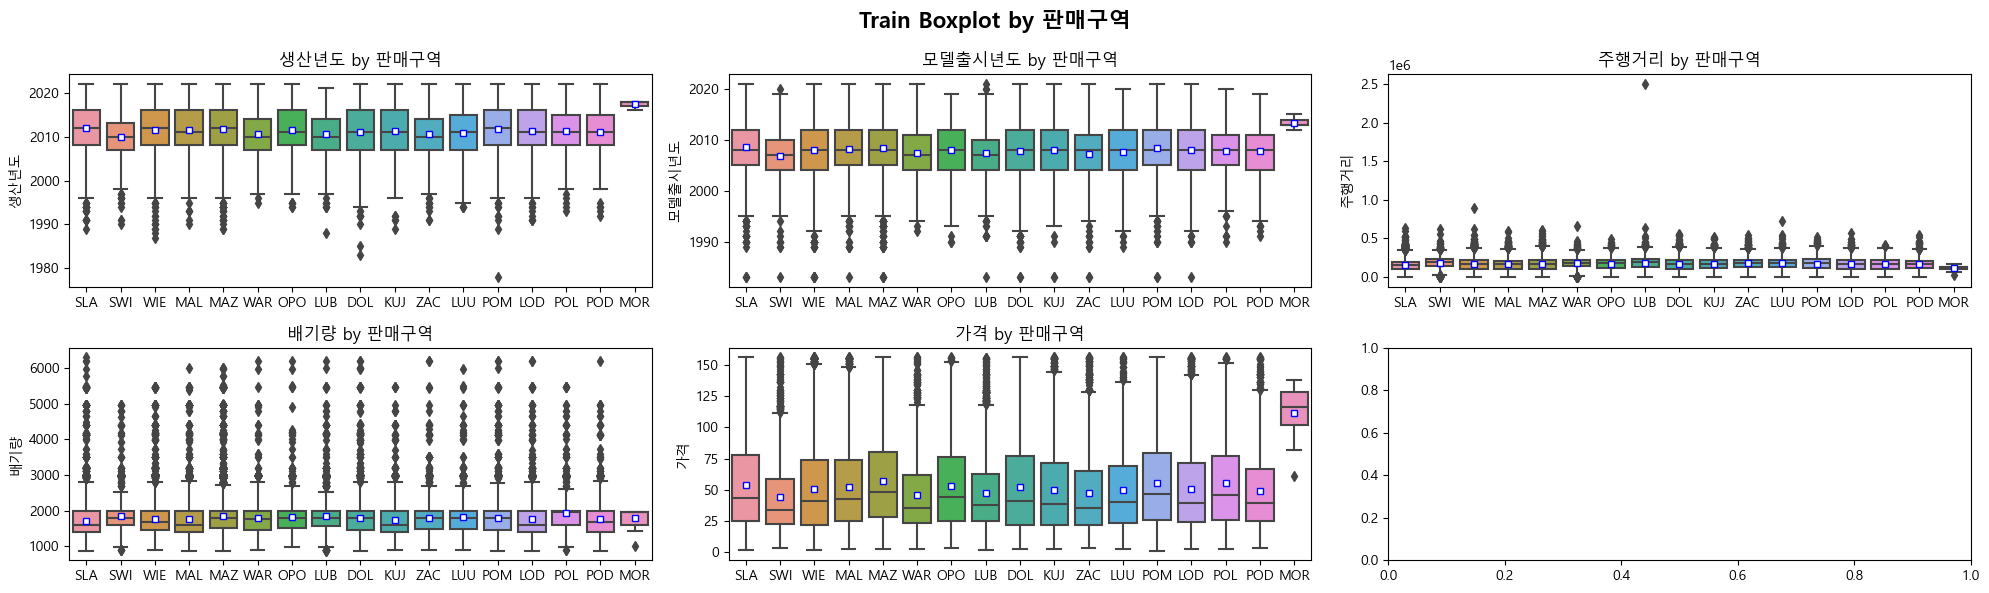

In [70]:
plot_boxplot(train, hue=True, hues='판매구역', title='Train', drop_cols=object_cols)

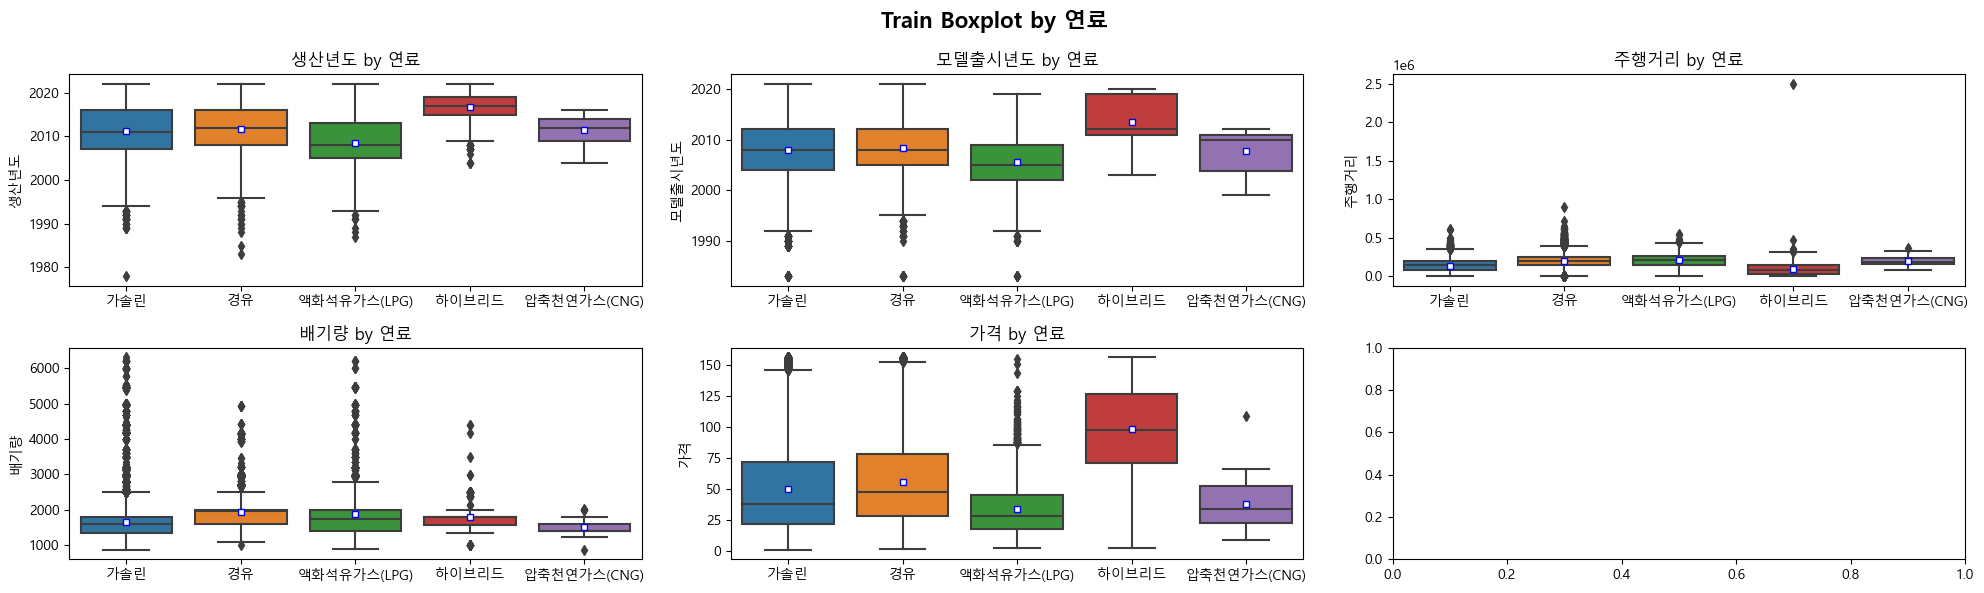

In [71]:
plot_boxplot(train, hue=True, hues='연료', title='Train', drop_cols=object_cols)

## violinplot
- train data violinplot

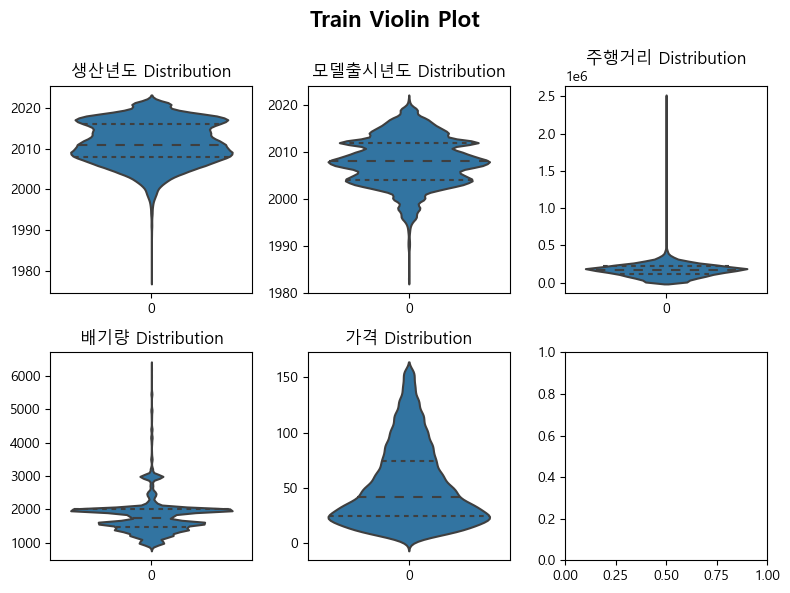

In [72]:
plot_violinplot(train, title='Train', drop_cols=object_cols, n_cols=3)

- 범주형 변수 별 violinplot(브랜드, 판매구역, 연료)

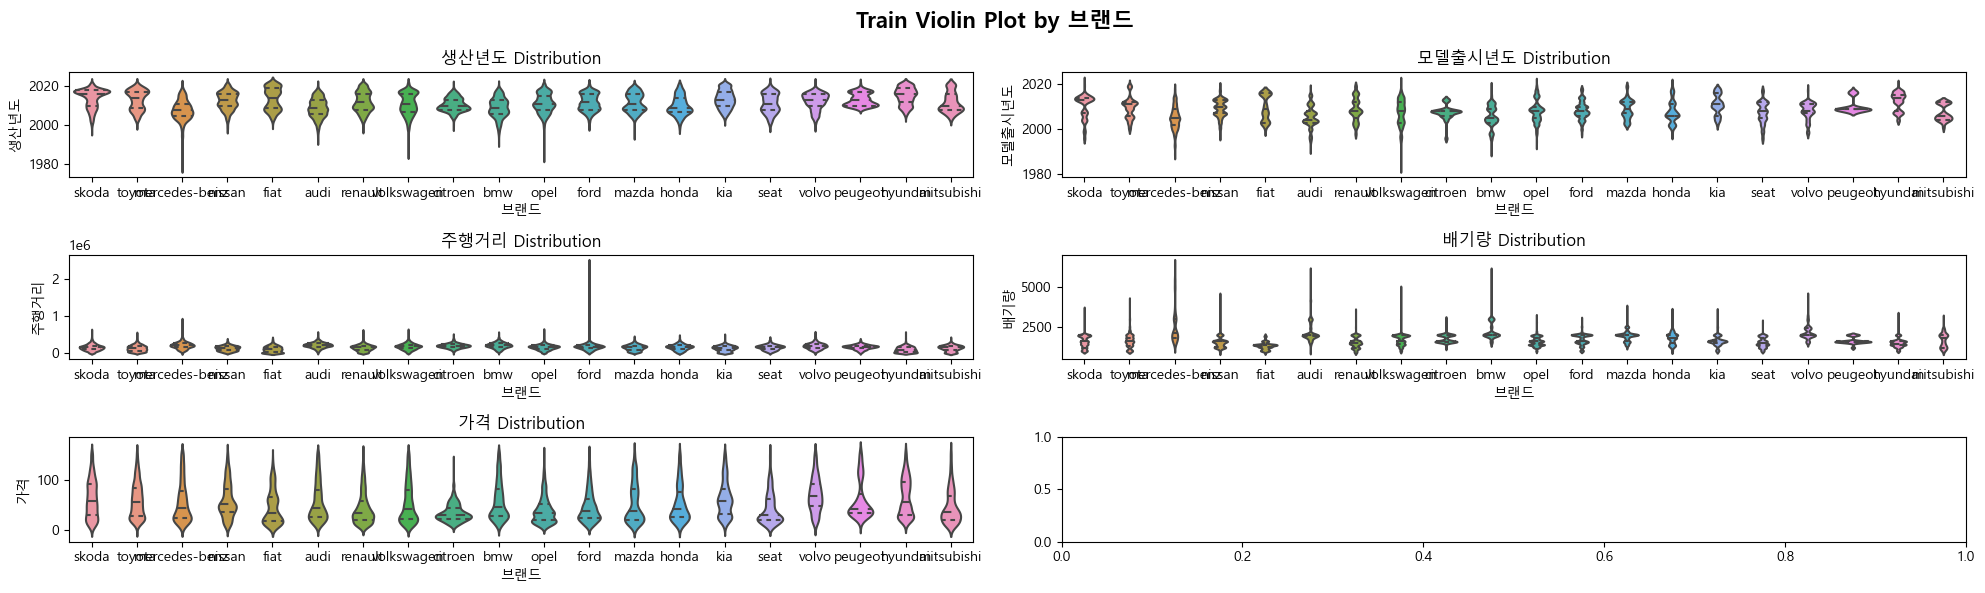

In [73]:
plot_violinplot(train, hue=True, hues='브랜드', title='Train', drop_cols=object_cols, n_cols=2)

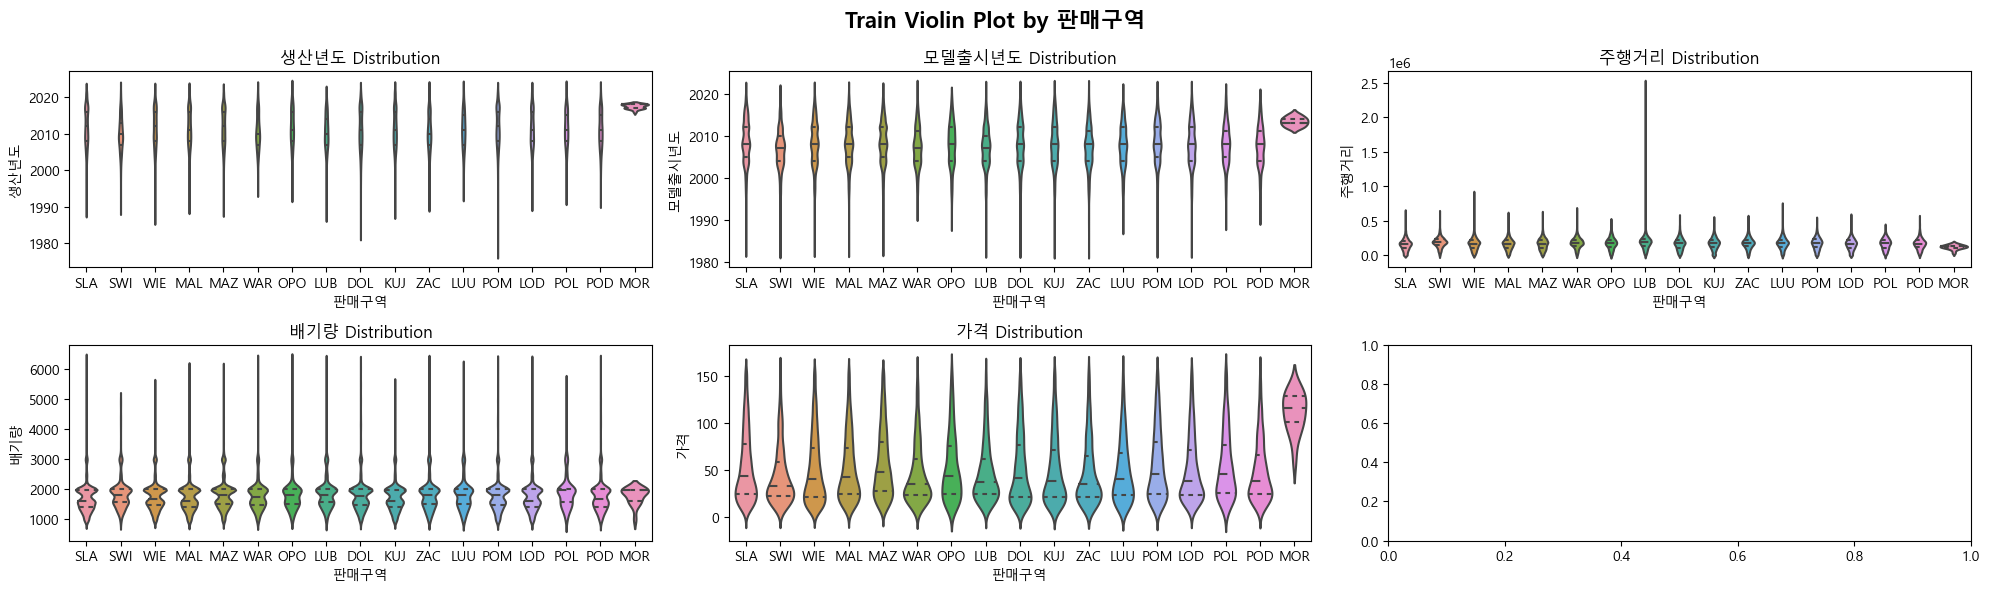

In [74]:
plot_violinplot(train, hue=True, hues='판매구역', title='Train', drop_cols=object_cols, n_cols=3)

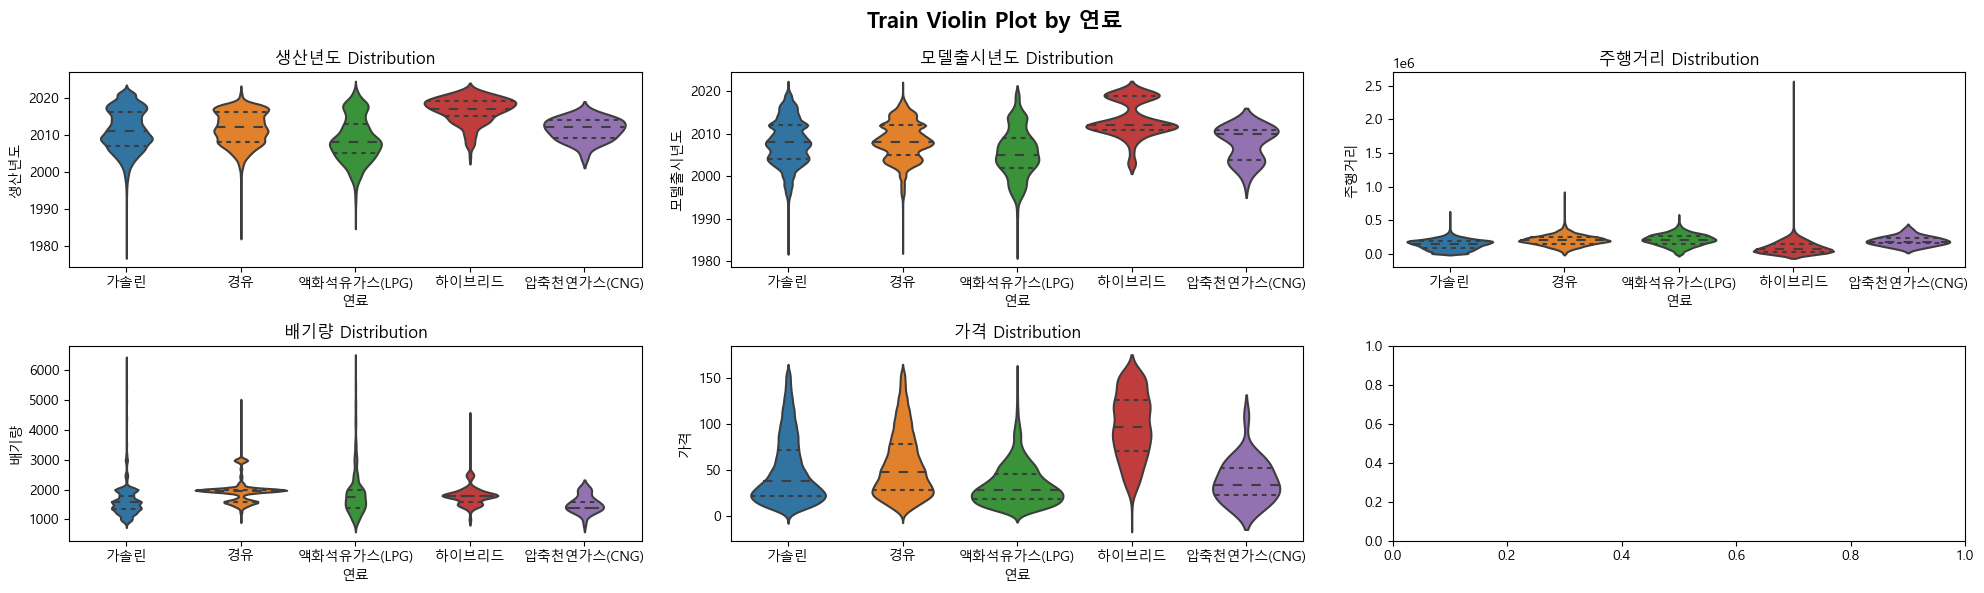

In [75]:
plot_violinplot(train, hue=True, hues='연료', title='Train', drop_cols=object_cols, n_cols=3)

## pairplot

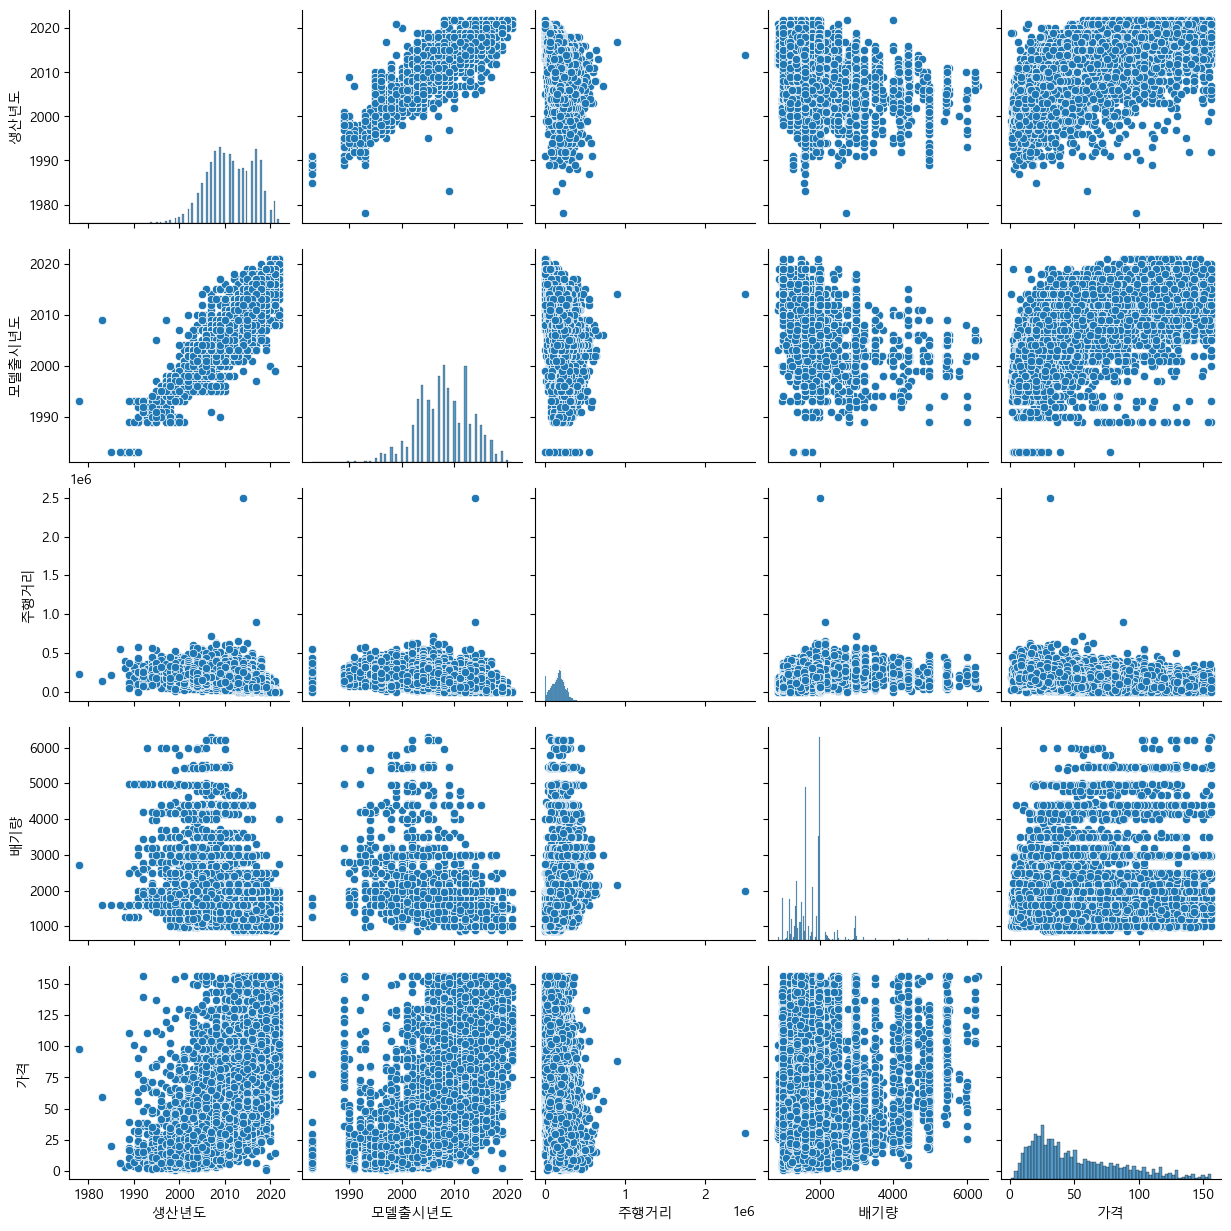

In [76]:
sns.pairplot(train)

## 변수별 상관관계 확인

<Axes: >

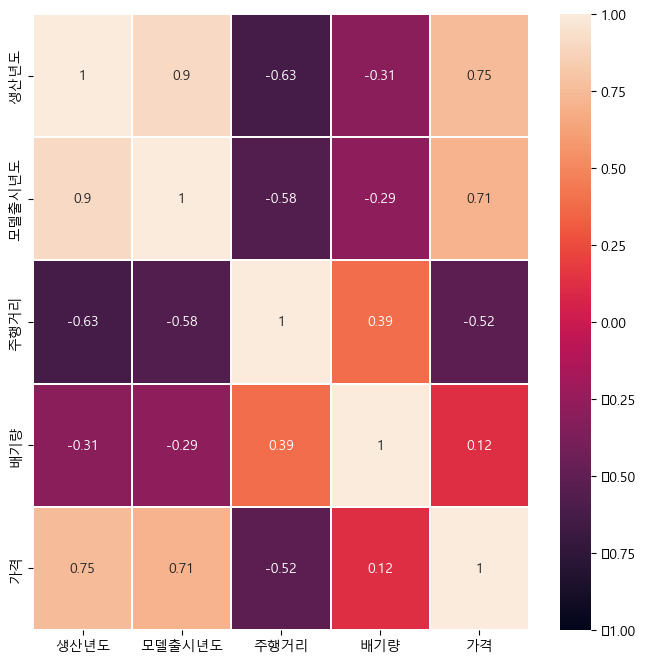

In [78]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(), annot=True, linewidths=0.1, vmax=1.0, vmin=-1.0)